In [24]:
from src.functions import *

In [25]:
methods = ['random', 'local']

In [26]:
qubit_sweeps = {}
delta = {}
delta_avg = {}
delta_std = {}
fit = {}
k = {}
k_err = {}

for method in methods:
    qubit_sweeps[method] = load_from_json(f'data/qubit_sweep_{method}.json')

    delta[method] = qubit_sweeps[method]['delta']
    delta_avg[method] = qubit_sweeps[method]['delta_avg']
    delta_std[method] = qubit_sweeps[method]['delta_std']
    fit[method] = qubit_sweeps[method]['fit']
    k[method] = qubit_sweeps[method]['k']
    k_err[method] = qubit_sweeps[method]['k_err']

T = qubit_sweeps['random']['T']
qubits_range = qubit_sweeps['random']['qubits_range']
num_random_models = qubit_sweeps['random']['num_random_models']

colors = {'random': grey,
          'local': blue,
          'quantum': red,
          'mismatches': 'orange'}

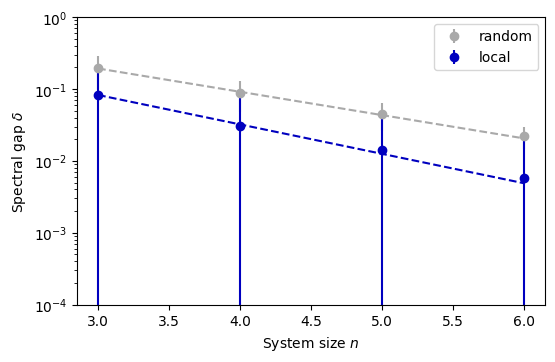

In [27]:
fig = plt.figure(figsize=(figure_size_x, figure_size_y))

for method in methods:

    # Plot the data with error bars
    plt.errorbar(qubits_range, delta_avg[method], yerr=delta_std[method], fmt='o', color=colors[method], label=method)
    # Plot the fits
    plt.plot(qubits_range, fit[method], '--', color=colors[method])

plt.yscale('log')
plt.ylim([0.0001, 1])

# Customize the plot
plt.xlabel('System size $n$')
plt.ylabel('Spectral gap $\delta$')

plt.legend()
plt.show()

In [31]:
for method in methods:
    print(f"k factor for {method}: {k[method]} ± {k_err[method]}")

k factor for random: 1.0763125367750983 ± 0.02573666327565431
k factor for local: 1.3589144083537545 ± 0.0683586988977084
